In [5]:
import pandas as pd,numpy as np,seaborn as sns,matplotlib.pyplot as plt

# About Dataset

## Context
This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective is to predict based on diagnostic measurements whether a patient has diabetes.

### Content
Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

### Pregnancies: Number of times pregnant.
### Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test.
### BloodPressure: Diastolic blood pressure (mm Hg).
### SkinThickness: Triceps skin fold thickness (mm).
### Insulin: 2-Hour serum insulin (mu U/ml).
### BMI: Body mass index (weight in kg/(height in m)^2).
### DiabetesPedigreeFunction: Diabetes pedigree function
### Age: Age (years)
### Outcome: Class variable (0 or 1)
## Sources:
(a) Original owners: National Institute of Diabetes and Digestive and
Kidney Diseases
(b) Donor of database: Vincent Sigillito (vgs@aplcen.apl.jhu.edu)
Research Center, RMI Group Leader
Applied Physics Laboratory
The Johns Hopkins University
Johns Hopkins Road
Laurel, MD 20707
(301) 953-6231
(c) Date received: 9 May 1990

In [6]:
# import 'diabetes' csv file using pandas library
diab = pd.read_csv('files/diabetes.csv')

In [7]:
# View first few rows of data.
diab.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
# Numbers of rows and columns in dataframe.
diab.shape

(768, 9)

In [9]:
# View data types and null values.
diab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [10]:
# View all null values by columns
diab.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

<AxesSubplot:xlabel='Pregnancies', ylabel='count'>

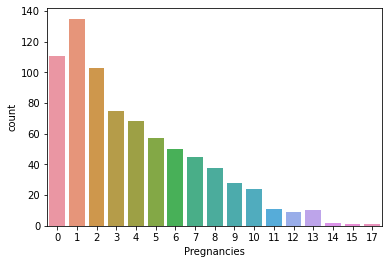

In [11]:
# Count the frequency of 'number of pregnancies'.
#The result shows that most women in the data have had between 0 to 3 pregnancies.
sns.countplot(data=diab, x='Pregnancies')

<AxesSubplot:xlabel='Outcome', ylabel='count'>

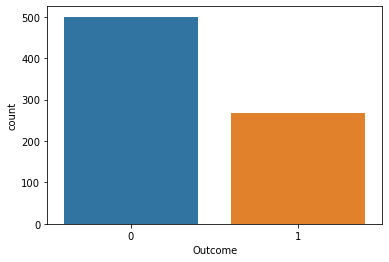

In [12]:
# Outcome 'O' is double Outcome '1'.
sns.countplot(data=diab, x='Outcome')

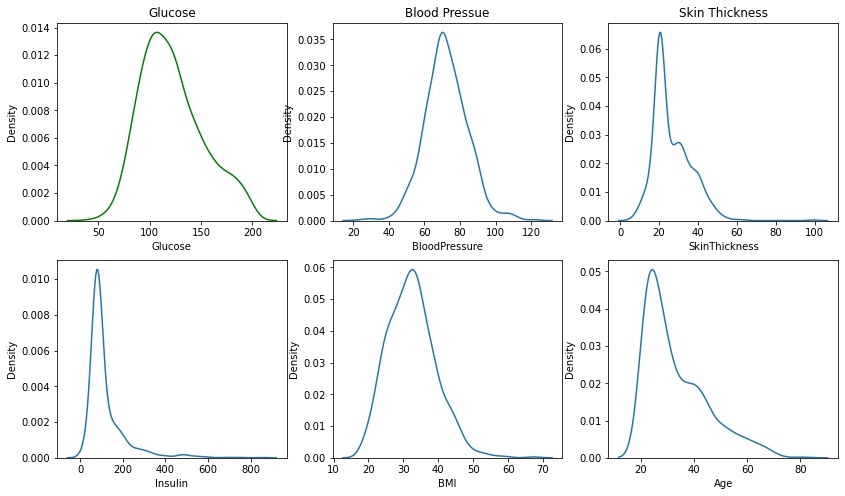

In [75]:

fig, axes = plt.subplots(2,3)
sns.kdeplot(data=diab,x='Glucose',ax=axes[0,0],color='green').set(title='Glucose')
sns.kdeplot(data=diab,x='BloodPressure',ax=axes[0,1]).set(title='Blood Pressue')
sns.kdeplot(data=diab,x='SkinThickness',ax=axes[0,2]).set(title='Skin Thickness')
sns.kdeplot(data=diab,x='Insulin',ax=axes[1,0])
sns.kdeplot(data=diab,x='BMI',ax=axes[1,1])
sns.kdeplot(data=diab,x='Age',ax=axes[1,2])
fig.set_size_inches(14, 8)

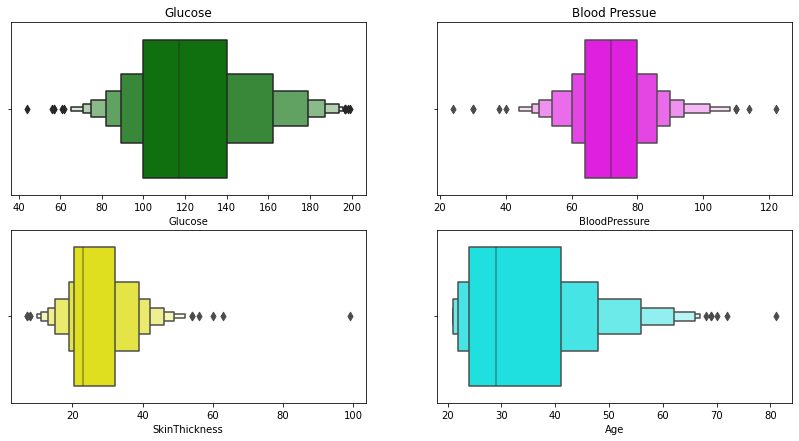

In [77]:
fig, axes = plt.subplots(2,2)
sns.boxenplot(data=diab,x='Glucose',ax=axes[0,0],color='green').set(title='Glucose')
sns.boxenplot(data=diab,x='BloodPressure',ax=axes[0,1],color='magenta').set(title='Blood Pressue')
sns.boxenplot(data=diab,x='SkinThickness',ax=axes[1,0],color='yellow')
sns.boxenplot(data=diab,x='Age',ax=axes[1,1],color='cyan')
#sns.kdeplot(data=diab,x='BMI',ax=axes[2,0])
fig.set_size_inches(14,7)

In [15]:
diab['BloodPressure'].describe()

count    768.000000
mean      69.105469
std       19.355807
min        0.000000
25%       62.000000
50%       72.000000
75%       80.000000
max      122.000000
Name: BloodPressure, dtype: float64

In [16]:
diabcorr = diab.drop(columns= 'Outcome')


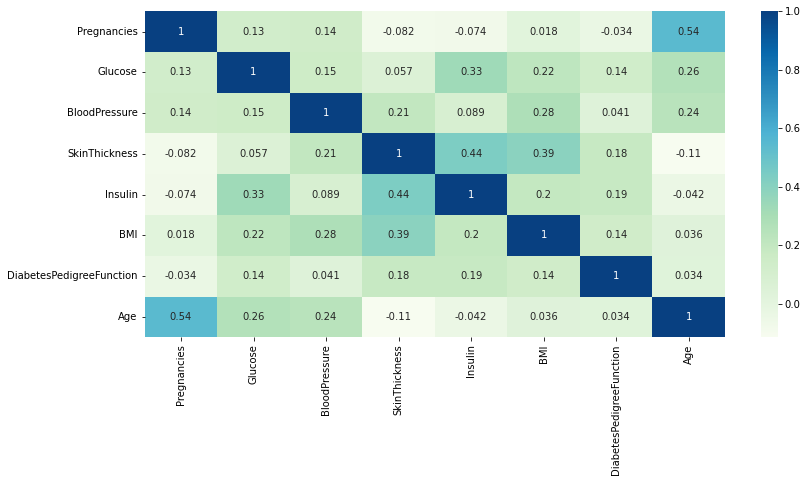

In [85]:
fig, ax = plt.subplots(1,1)
sns.heatmap(diabcorr.corr(),annot=True,cmap='GnBu')
fig.set_size_inches(13,6)

In [18]:
(diab['BloodPressure'].abs()==0).sum()/len(diab['BloodPressure'])*100

4.557291666666666

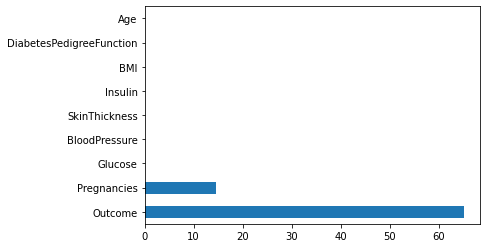

In [79]:
diab_zerovalues = round((diab==0).sum()/diab.index.size*100,1)
diab_zerovalues.sort_values(ascending=False).plot.barh()

In [20]:
(diab==0).sum()/len(diab)*100

Pregnancies                 14.453125
Glucose                      0.651042
BloodPressure                4.557292
SkinThickness               29.557292
Insulin                     48.697917
BMI                          1.432292
DiabetesPedigreeFunction     0.000000
Age                          0.000000
Outcome                     65.104167
dtype: float64

In [21]:
diab = diab.replace({'BloodPressure': {0: diab['BloodPressure'].mean()}})


In [22]:
diab = diab.replace({'Insulin': {0: diab['Insulin'].mean()}})

In [23]:
diab = diab.replace({'SkinThickness': {0: diab['SkinThickness'].mean()}})


In [24]:
diab = diab.replace({'BMI': {0: diab['BMI'].mean()}})


In [25]:
diab = diab.replace({'Glucose': {0: diab['Glucose'].mean()}})

In [26]:
(diab==0).sum()

Pregnancies                 111
Glucose                       0
BloodPressure                 0
SkinThickness                 0
Insulin                       0
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [27]:
diab.to_csv('diabetes_clean.csv',index=False)

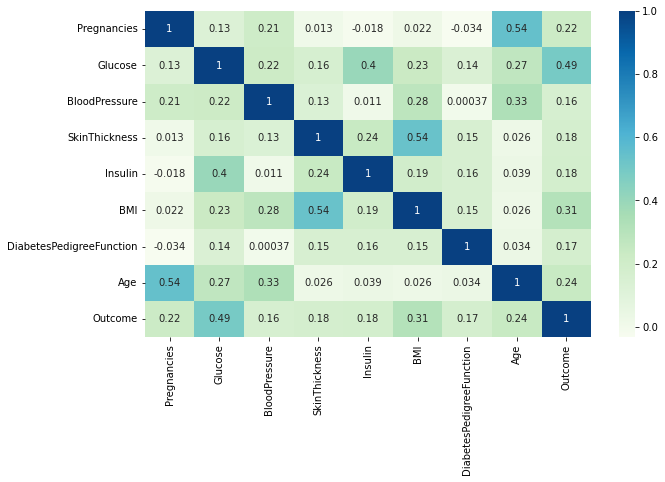

In [88]:
fig, ax = plt.subplots(1,1)
sns.heatmap(diab.corr(),annot=True,cmap='GnBu')
fig.set_size_inches(10,6)

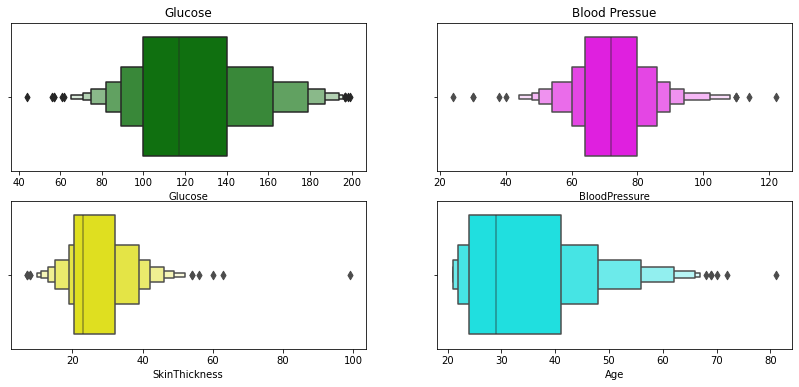

In [92]:
fig, axes = plt.subplots(2,2)
sns.boxenplot(data=diab,x='Glucose',ax=axes[0,0],color='green').set(title='Glucose')
sns.boxenplot(data=diab,x='BloodPressure',ax=axes[0,1],color='magenta').set(title='Blood Pressue')
sns.boxenplot(data=diab,x='SkinThickness',ax=axes[1,0],color='yellow')
sns.boxenplot(data=diab,x='Age',ax=axes[1,1],color='cyan')
#sns.kdeplot(data=diab,x='BMI',ax=axes[2,0])
fig.set_size_inches(14,6)

In [91]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,r2_score
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance
from sklearn.svm import SVC

In [31]:
X= diab.drop(columns='Outcome')
y = diab['Outcome']

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state = 42 )

In [33]:
sc = StandardScaler()
scale = sc.fit(X_train)
X_train_st=scale.transform(X_train)
X_test_st=scale.transform(X_test)

In [34]:
rfc = RandomForestClassifier()
rfc.fit(X_train_st,y_train)
ypred = rfc.predict(X_test_st)
racc = accuracy_score(ypred,y_test)

In [35]:
xgb = XGBClassifier()
xgb.fit(X_train_st,y_train)
ypred = xgb.predict(X_test_st)
xacc = accuracy_score(ypred,y_test)

In [36]:
svc = SVC()
svc.fit(X_train_st,y_train)
ypred = svc.predict(X_test_st)
svcacc = accuracy_score(ypred,y_test)

In [37]:
accura = [['randomforest',racc],['xgboost',xacc],['svc',svcacc]]

In [38]:
pd.DataFrame(accura,columns=['model','accuracy score'])

,model,accuracy score
0,randomforest,0.727273
1,xgboost,0.740260
2,svc,0.733766


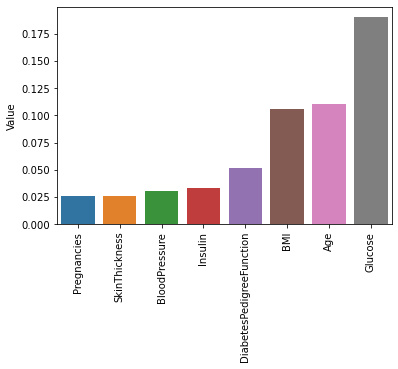

In [57]:
perm_importance = permutation_importance(rfc, X_train_st, y_train)
sort = perm_importance.importances_mean.argsort()
df = pd.DataFrame(perm_importance.importances_mean[sort], X_test.columns[sort], columns=['Value'])
sns.barplot(data = df,x= X_test.columns[sort],y='Value')
plt.xticks(rotation=90)
plt.show()

In [95]:
# Import the Shapley Additive Explanation library.
import shap

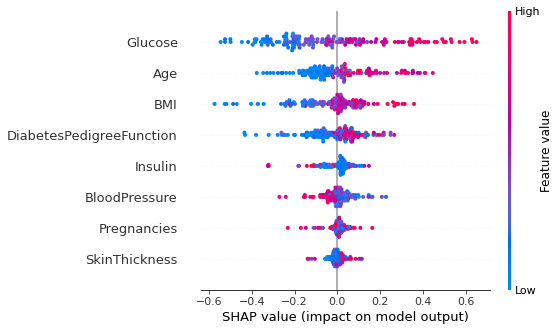

In [96]:
explainer = shap.Explainer(xgb.predict,X_test_st,feature_names=X_test.columns)
shap_values = explainer(X_test_st)
shap.summary_plot(shap_values, sort=True)

Exact explainer: 155it [00:45,  2.61it/s]                         


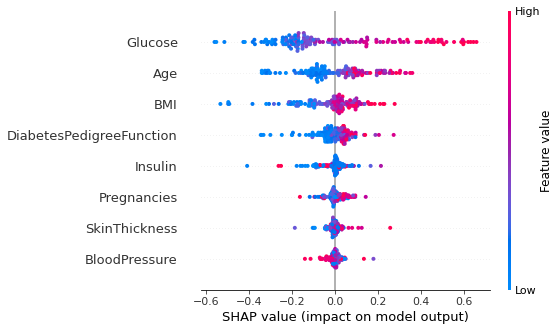

In [97]:
explainer = shap.Explainer(rfc.predict,X_test_st,feature_names=X_test.columns)
shap_values = explainer(X_test_st)
shap.summary_plot(shap_values, sort=True)

#### Based on the Shapley Additive Explanations it can be inferred that 
##### (1.) Glucose Is the most important feature in the random forest model prediction.
##### (2.) The least important features are Skinthickness and Blood-pressure.